# Load Necessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import time
import sqlite3
data_home='./'

# Load and Process the Datasets

## Load Triplets data  [user, song, play_count]

#### Get the data from http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [2]:
triplet_dataset = pd.read_csv(filepath_or_buffer='train_triplets.txt', nrows=10000, sep='\t', header=None,
                             names = ['user', 'song', 'play_count'])

In [3]:
triplet_dataset.head(10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [4]:
triplet_dataset.shape

(10000, 3)

## Get User and total play counts

In [ ]:
output_dict = {}
with open('train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        if user in output_dict:
            play_count += output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
output_dict = [{'user':k, 'play_count':v} for k,v in output_dict.items()]
play_count_df = pd.DataFrame(output_dict)
play_count_df = play_count_df.sort_values(by='play_count', ascending=False)

In [ ]:
play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

In [9]:
play_count_df = pd.read_csv("user_playcount_df.csv")
play_count_df.head()

,play_count,user
0,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
1,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
2,8210,3fa44653315697f42410a30cb766a4eb102080bb
3,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
4,6494,d7d2d888ae04d16e994d6964214a1de81392ee04


## Get Song and total play counts

In [11]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [ ]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

In [10]:
song_count_df = pd.read_csv("song_playcount_df.csv")
song_count_df.head()

,play_count,song
0,726885,SOBONKR12A58A7A7E0
1,648239,SOAUWYT12A81C206F1
2,527893,SOSXLTC12AF72A7F54
3,425463,SOFRQTD12A81C233C0
4,389880,SOEGIYH12A6D4FC0E3


## View top users and songs

In [17]:
play_count_df.head(10)                  

,play_count,user
0,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
1,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
2,8210,3fa44653315697f42410a30cb766a4eb102080bb
3,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
4,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
5,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
6,6150,b7c24f770be6b802805ac0e2106624a517643c17
7,5656,113255a012b2affeab62607563d03fbdf31b08e7
8,5620,6d625c6557df84b60d90426c0116138b617b9449
9,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [16]:
song_count_df.head(10)

,play_count,song
0,726885,SOBONKR12A58A7A7E0
1,648239,SOAUWYT12A81C206F1
2,527893,SOSXLTC12AF72A7F54
3,425463,SOFRQTD12A81C233C0
4,389880,SOEGIYH12A6D4FC0E3
5,356533,SOAXGDH12A8C13F8A1
6,292642,SONYKOW12AB01849C9
7,274627,SOPUCYA12A8C13A694
8,268353,SOUFTBI12AB0183F65
9,244730,SOVDSJC12A58A7A271


## Subsetting the data

In [11]:
total_play_count = sum(song_count_df.play_count)
(float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100
play_count_subset = play_count_df.head(n=100000)

In [12]:
(float(song_count_df.head(30000).play_count.sum())/total_play_count)*100
song_count_subset = song_count_df.head(n=30000)

In [13]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [19]:
triplet_dataset = pd.read_csv('train_triplets.txt', nrows=500000 ,sep='\t', header=None, names=['user','song','play_count'])
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [20]:
triplet_dataset_sub_song.to_csv(path_or_buf='triplet_dataset_sub_song.csv', index=False)

In [21]:
triplet_dataset_sub_song.shape

(113437, 3)

In [23]:
triplet_dataset_sub_song.head(10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## Adding songs metadata from million songs dataset

#### Get the data from http://labrosa.ee.columbia.edu/millionsong/sites/default/files/track_metadata.db

In [22]:
conn = sqlite3.connect('track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [23]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [24]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
145,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
172,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
191,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [28]:
track_metadata_df_sub.to_csv(path_or_buf='track_metadata_df_sub.csv', index=False)

In [26]:
track_metadata_df.shape

(1000000, 14)

## Load up the saved data subsets

In [32]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer='train_triplets_sub_song.csv')
track_metadata_df_sub = pd.read_csv(filepath_or_buffer='track_metadata_df_sub.csv')

## Clean up datasets

In [33]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'}, inplace=True)

In [34]:
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [35]:
triplet_dataset_sub_song_merged.head(10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


# Some visualizations

## Most popular songs

In [40]:
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(20)

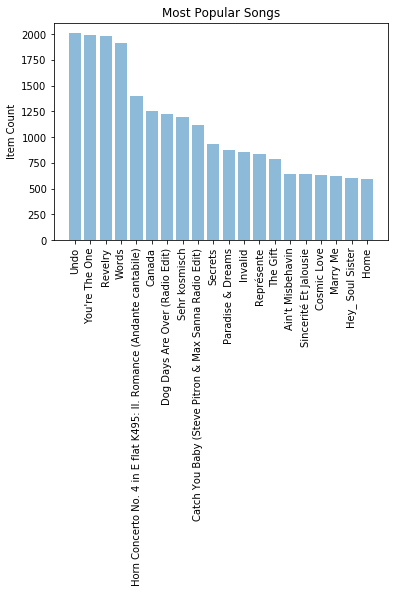

In [42]:
import matplotlib.pyplot as plt
import numpy as np

objects = (list(popular_songs_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_songs_top_20['listen_count'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel("Item Count")
plt.title("Most Popular Songs")
plt.show()

## Most popular releases

In [43]:
popular_release = triplet_dataset_sub_song_merged[['release', 'listen_count']].groupby('release').sum().reset_index()
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(20)

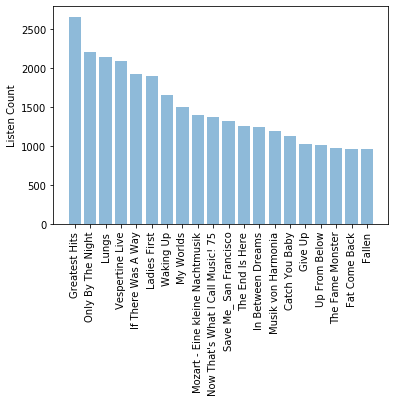

In [46]:
objects = popular_release_top_20['release']
x = np.arange(len(objects))
y = popular_release_top_20['listen_count']

plt.bar(x,y, align='center', alpha=0.5)
plt.xticks(x, objects, rotation='vertical')
plt.ylabel("Listen Count")
plt.show()

## Most popular artists

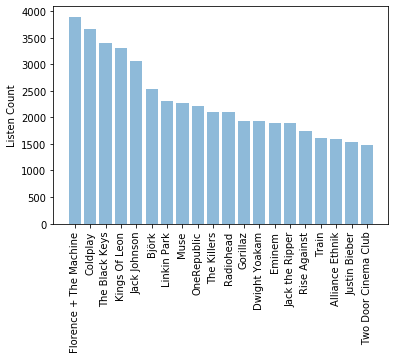

In [48]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name', 'listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(20)

objects = popular_artist_top_20['artist_name']
x = np.arange(len(objects))
y = popular_artist_top_20['listen_count']

plt.bar(x,y, align='center', alpha=0.5)
plt.xticks(x, objects, rotation='vertical')
plt.ylabel("Listen Count")
plt.show()

## Song count distribution

In [54]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user', 'title']].groupby('user').count().reset_index().sort_values(by='title', ascending=False)
user_song_count_distribution.title.describe()

count    1068.000000
mean      106.214419
std        81.572295
min         4.000000
25%        49.750000
50%        86.000000
75%       139.250000
max       809.000000
Name: title, dtype: float64

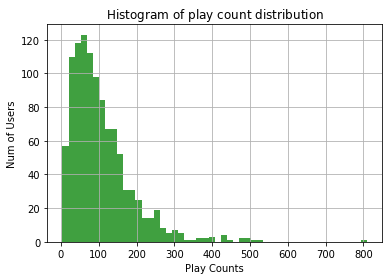

In [55]:
x= user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title(r'$\mathrm{Histogram\ of\ play\ count\ distribution}\ $')
plt.grid(True)
plt.show()

# Recommendation Engines

In [56]:
import Recommenders as Recommenders
from sklearn.model_selection import train_test_split

## Popularity based recommendations

In [59]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size=0.4, random_state=0)

In [60]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
5642,f927dddfe26b0c74ada3eaadca41bfb462c37ee4,SONASKH12A58A77831,8,Jingle Bell Rock,50's Jukebox Hits - Vol. 1,Bobby Helms,1957
13755,76a30456a74c0d242c62719ef20a2a3029660691,SOMOKCH12A8159E8A0,1,Needle In The Hay,Elliott Smith,Elliott Smith,0
83321,bf838d0330d0d40f2a4f3d49ad902e747ece273e,SOFGSSS12A67020463,1,Dosed (Album Version),By The Way,Red Hot Chili Peppers,2002
22839,befdd50134a9ad0e512d1604d057b540cbef87dd,SOMAUXP12AB018051D,1,Flaca,Andres CD1,Andres Calamaro,1997
104286,5be81a8b39b08b3d8a125795da3ed38f119efab6,SOQLDTI12AB018C80A,2,Stilettos,Latin,Holy Fuck,2010


In [64]:
def create_popularity_recommendation(train_data, user_id, item_id):
    # Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = train_data.groupby([item_id]).agg({user_id:'count'}).reset_index()
    train_data_grouped.rename(columns={user_id:'score'}, inplace=True)
    
    # Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending=[0,1])
    
    # Generate a recommendation rank based on the score
    train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    
    # Get top 10 recommendations
    popularity_recommendations = train_data_sort.head(10)
    return popularity_recommendations

In [65]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged, 'user', 'title')

In [66]:
recommendations

,title,score,rank
16508,Sehr kosmisch,189,1.0
4850,Dog Days Are Over (Radio Edit),186,2.0
16479,Secrets,144,3.0
21132,Undo,143,4.0
22995,You're The One,133,5.0
6327,Fireflies,128,6.0
8380,Horn Concerto No. 4 in E flat K495: II. Romanc...,128,7.0
15715,Revelry,128,8.0
21251,Use Somebody,127,9.0
8141,Hey_ Soul Sister,123,10.0


## Item similarity  based recommendations

In [76]:
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_df.song)
triplet_data_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [77]:
triplet_data_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [95]:
# limit size for faster execution
triplet_data_sub_song_merged_sub = triplet_data_sub_song_merged_sub.head(n=10000)
triplet_data_sub_song_merged_sub.shape

(10000, 7)

In [96]:
train_data, test_data = train_test_split(triplet_data_sub_song_merged_sub, test_size=0.3, random_state=0)
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[5]
user_items = is_model.get_user_items(user_id)

In [97]:
is_model.recommend(user_id)

No. of unique songs for the user: 310
no. of unique songs in the training set: 5140
Non zero values in cooccurence_matrix :130569


,user_id,song,score,rank
0,5a905f000fc1ff3df7ca807d57edb608863db05d,Oh!,0.065016,1
1,5a905f000fc1ff3df7ca807d57edb608863db05d,Imaginary Love,0.064871,2
2,5a905f000fc1ff3df7ca807d57edb608863db05d,Shine Shine,0.058172,3
3,5a905f000fc1ff3df7ca807d57edb608863db05d,Needy Girl,0.058172,4
4,5a905f000fc1ff3df7ca807d57edb608863db05d,Watch The Tapes,0.058172,5
5,5a905f000fc1ff3df7ca807d57edb608863db05d,Alice Practise,0.058172,6
6,5a905f000fc1ff3df7ca807d57edb608863db05d,Love And Caring,0.058172,7
7,5a905f000fc1ff3df7ca807d57edb608863db05d,So Glad To See You,0.058172,8
8,5a905f000fc1ff3df7ca807d57edb608863db05d,Shake A Fist,0.058172,9
9,5a905f000fc1ff3df7ca807d57edb608863db05d,The Way Things Go,0.056622,10


## Matrix factorization  based recommendations

In [100]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user', 'listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'}, inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged, triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [104]:
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.user == "d6589314c0a9bcbca4fee0c93b14bc402363afea"][['user', 'song', 'listen_count', 'fractional_play_count']].head()

,user,song,listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,0.021277


In [106]:
from scipy.sparse import coo_matrix

small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
user_codes['us_index_value'] = list(user_codes.index)
song_codes['so_index_value'] = list(song_codes.index)
small_set = pd.merge(small_set, song_codes, how='left')
small_set = pd.merge(small_set, user_codes, how='left')
mat_candidate = small_set[['us_index_value', 'so_index_value', 'fractional_play_count']]
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
column_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, column_array)), dtype=float)

In [107]:
data_sparse

<1068x25013 sparse matrix of type '<class 'numpy.float64'>'
	with 113437 stored elements in COOrdinate format>

In [111]:
user_codes[user_codes.user == 'd6589314c0a9bcbca4fee0c93b14bc402363afea']

,user_index,user,us_index_value
0,0,d6589314c0a9bcbca4fee0c93b14bc402363afea,0


In [112]:
import math as mt
from scipy.sparse.linalg import *
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [118]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)
    
    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0,len(s)):
        S[i,i] = mt.sqrt(s[i])
        
    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt
    max_recommendation=250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float32)
    recomendRatings = np.zeros(shape=(MAX_UID, max_recommendation), dtype=np.float32)
    for userTest in uTest:
        prod = U[userTest, : ]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

In [119]:
K = 50
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)

In [120]:
uTest = [4,5,6,7,8,873,23]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

In [121]:
for user in uTest:
    print("Recommendation for user with user id {}".format(user))
    rank_value=1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value== i].drop_duplicates('so_index_value')[['title', 'artist_name']]
        print("The number {} recommended song is {} BY {}.".format(rank_value,list(song_details['title'])[0] ,list(song_details['artist_name'])[0]))
        rank_value += 1

Recommendation for user with user id 4
The number 1 recommended song is Velcro Fly BY ZZ Top.
The number 2 recommended song is Sehr kosmisch BY Harmonia.
The number 3 recommended song is Secrets BY OneRepublic.
The number 4 recommended song is Almaz BY Randy Crawford.
The number 5 recommended song is That Look BY Ultra DJ's.
The number 6 recommended song is Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) BY Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner.
The number 7 recommended song is Hey_ Soul Sister BY Train.
The number 8 recommended song is Nothin' On You [feat. Bruno Mars] (Album Version) BY B.o.B.
The number 9 recommended song is Sugar Ray (LP Version) BY Todd Barry.
The number 10 recommended song is Fireflies BY Charttraxx Karaoke.
Recommendation for user with user id 5
The number 1 recommended song is Undo BY Björk.
The number 2 recommended song is Dog Days Are Over (Radio Edit) BY Florence + The Machine.
The number 3 recommended son

In [123]:
user_codes['us_index_value']

0          0
1          1
2          2
3          3
4          4
        ... 
1063    1063
1064    1064
1065    1065
1066    1066
1067    1067
Name: us_index_value, Length: 1068, dtype: int64

In [124]:
uTest = [1037]
# Get estimated rating for test user
print("Predicted Ratings:")
uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

Predicted Ratings:


In [128]:
for user in uTest:
    print("Recommendation for user with user id {}".format(user))
    rank_value = 1
    for i in uTest_recommended_items[user, 0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title', 'artist_name']]
        print("The number {} recommended song is {} BY {}.".format(rank_value, list(song_details['title'])[0], list(song_details['artist_name'])[0]))
        rank_value += 1

Recommendation for user with user id 1037
The number 1 recommended song is Dog Days Are Over (Radio Edit) BY Florence + The Machine.
The number 2 recommended song is Sehr kosmisch BY Harmonia.
The number 3 recommended song is Cosmic Love BY Florence + The Machine.
The number 4 recommended song is Secrets BY OneRepublic.
The number 5 recommended song is Almaz BY Randy Crawford.
The number 6 recommended song is Velcro Fly BY ZZ Top.
The number 7 recommended song is Pull BY Blind Melon.
The number 8 recommended song is Hey_ Soul Sister BY Train.
The number 9 recommended song is Marry Me BY Train.
The number 10 recommended song is Fireflies BY Charttraxx Karaoke.
